In [ ]:
#importing libraries
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor


In [ ]:
# loading preloaded dataset fashionmnist
train_data = datasets.FashionMNIST(
    root="/content/fashion_mnist_data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.98MB/s]
100%|██████████| 26.4M/26.4M [00:01<00:00, 16.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.02MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.36MB/s]


In [ ]:
import numpy as np
import pandas

In [ ]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
img,label=train_data[0]

In [ ]:
img.shape #[no.of channel,height,width] size representation in pytorch

torch.Size([1, 28, 28])

In [ ]:
import matplotlib.pyplot as plt

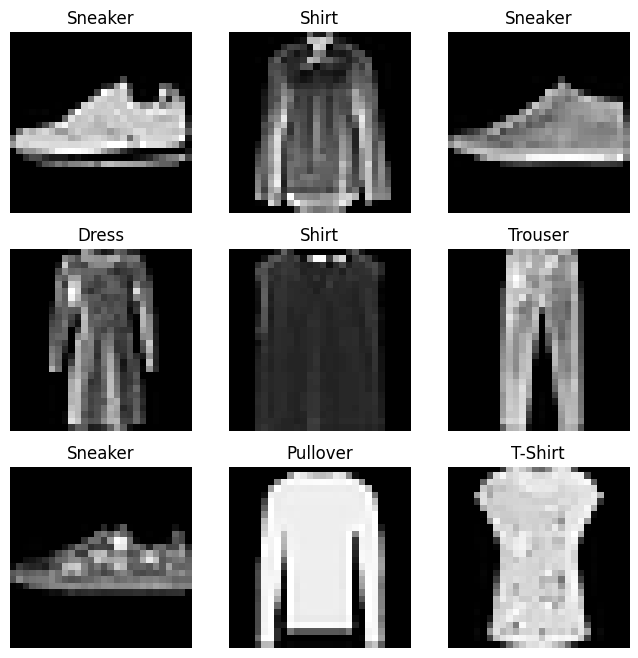

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Dataset class: Loads and provides access to individual data samples (implements __len__ and __getitem__).

DataLoader class: Creates iterable batches, handles shuffling, and supports parallel data loading with multiple workers.

In [ ]:
# Dataset and dataloader
from torch.utils.data import DataLoader,Dataset

class customdataset(Dataset):
  def __init__(self,feature_map,label):
    self.feature_map=feature_map
    self.label=label

  def __len__(self):
    # overridden methods in child class of base class
    # therefore not using __super__ because you are not calling method of parent class
    return self.feature_map.shape[0]

  def __getitem__(self, index): # overridden base class method
     #  All transformation of feature_map[index] done here if needed
     return self.feature_map[index],self.label[index]

# image_based data
feature_map=torch.stack([img for img,label in train_data],dim=0)
label=torch.tensor([label for img,label in train_data],dtype=torch.float32)
data=customdataset(feature_map,label)


# load wine dataset
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

# Features and target
X = wine.data       # numpy array of features
y = wine.target

data_reg=customdataset(X,y)


# Dataloader
# pass Customdata object as argument in Dataloader
loader1=DataLoader(data,batch_size=64,shuffle=True,num_workers=2)
loader2=DataLoader(data_reg,batch_size=64,shuffle=True,num_workers=2)

In [ ]:
data[7]


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.2471, 0.1098, 0.0000, 0.0000, 0.0000,
           0.1294, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
           0.1098, 0.4941, 0.9451, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
           1.0000, 0.9882, 0.9725, 0.4353, 0.0000, 0.0000, 0.0000, 0.0078,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.8078,
           0.9569, 0.9843, 0.9451, 0.9020, 0.9333, 0.8667, 0.8039, 0.9020,
           0.9412, 0.9020, 0.9373, 0.9843, 0.9137, 0.6471, 0.0000, 0.0000,
           0.0078, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.7804, 0.9843,
           0.8941, 0.9176, 0.9137, 0.9255, 0.9216, 0.9608, 0.9686, 0.9294,
           0.9176, 0.9373, 0.9020, 0.9020, 

In [ ]:
data_reg

In [ ]:
loader1

In [ ]:
loader2

The DataLoader class in PyTorch comes with several parameters that allow you to customize
how data is loaded, batched, and preprocessed. Some of the most commonly used and
important parameters include:
dataset (mandatory):
The Dataset from which the DataLoader will pull data.
Must be a subclass of torch.utils.data.Dataset that implements __getitem__ and
__len__.
* 1.
batch_size:
 * a.How many samples per batch to load.
 * b.Default is 1.
 * c.Larger batch sizes can speed up training on GPUs but require more memory.
* 2.
shuffle:
If True, the DataLoader will shuffle the dataset indices each epoch.
Helpful to avoid the model becoming too dependent on the order of samples.
* 3.
num_workers:
The number of worker processes used to load data in parallel.
Setting num_workers > 0 can speed up data loading by leveraging multiple CPU
cores, especially if I/O or preprocessing is a bottleneck.

* 4.
pin_memory:
If True, the DataLoader will copy tensors into pinned (page-locked) memory before
returning them.
This can improve GPU transfer speed and thus overall training throughput,particularly on CUDA systems.

* 5.
drop_last:
If True, the DataLoader will drop the last incomplete batch if the total number of
samples is not divisible by the batch size.Useful when exact batch sizes are required (for example, in some batch
normalization scenarios).

* 6.
collate_fn:
A callable that processes a list of samples into a batch (the default simply stacks
tensors).
Custom collate_fn can handle variable-length sequences, perform custom batching
logic, or handle complex data structures.

* 7.
sampler:
sampler defines the strategy for drawing samples (e.g., for handling imbalanced
classes, or custom sampling strategies).
 batch_sampler works at the batch level, controlling how batches are formed.
Typically, you don’t need to specify these if you are using batch_size and shuffle.
However, they provide lower-level control if you have advanced requirements.

### Collate function
The collate_fn in PyTorch's DataLoader is a function that specifies how to combine a list of
samples from a dataset into a single batch. By default, the DataLoader uses a simple batch
collation mechanism, but collate_fn allows you to customize how the data should be
processed and batched.